In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>EDA</h3>

In [43]:
#load data from csv
dt = pd.read_csv("MLDataTrain.csv")
dt.head()

,idsismo,idcountry,mag,place,time,tsunami,lng,lat,depth,danger
0,1,1,3.24,"11km N of Delta, B.C., MX",2010-01-01 02:33:42,0,-115.202833,32.453833,5.995,1
1,2,1,3.00,"10 km SW of Fairview, Wyoming",2010-01-01 04:13:44,0,-111.058000,42.616000,5.000,1
2,3,1,3.60,"10 km ESE of Maupin, Oregon",2010-01-02 16:36:45,0,-120.955500,45.137000,14.468,1
3,4,1,3.30,"19 km SE of Sleepy Hollow, Wyoming",2010-01-03 18:53:01,0,-105.271000,44.099000,0.000,1
4,5,1,3.81,"25km E of Primo Tapia, B.C., MX",2010-01-04 00:02:17,0,-116.655000,32.191500,5.631,1


<Axes: >

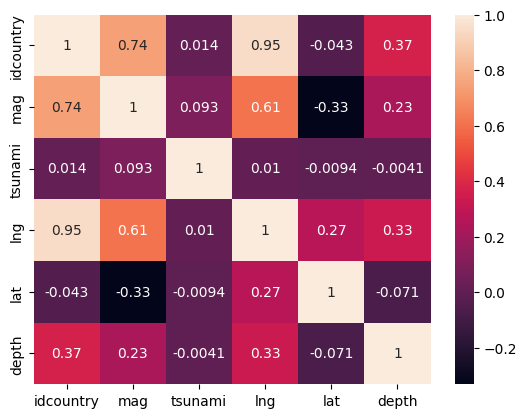

In [36]:
#choosing variables correlation graph
X = dt[['idcountry','mag','tsunami', 'lng', 'lat', 'depth']]
correlation = X.corr()
sns.heatmap(correlation, annot=True)

In [44]:
#set the model array
X = np.array(dt[['idcountry','mag', 'tsunami', 'depth']])

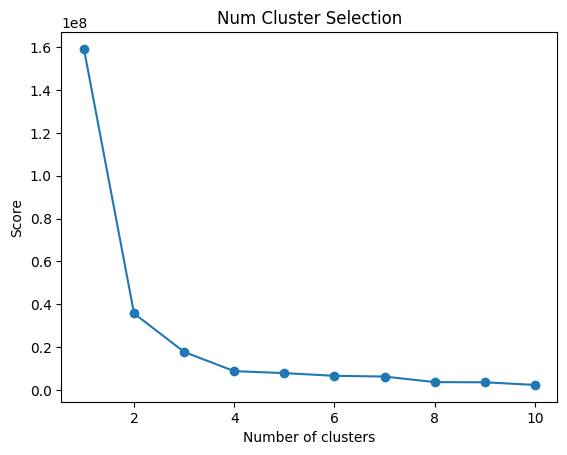

In [5]:
#choosing the best number of cluster
Score = []
for i in range(1, 11):
    kmeans_model = KMeans(
        n_clusters=i, init='random',
        n_init='auto',
        random_state=0
    )

    kmeans_model.fit(X)
    Score.append(kmeans_model.inertia_)
#graph    
plt.plot(range(1, 11), Score, marker='o')
plt.title('Num Cluster Selection')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()


<h3>Machine Learning Model</h3>

In [45]:
#model creation using args: mag, tsunami,depth
kmeans_model = KMeans(n_clusters=10, random_state=0, n_init="auto")

In [46]:
#training the model 
kmeans_model.fit(X)

KMeans(n_clusters=10, n_init='auto', random_state=0)

In [47]:
#assign labels
dt['danger'] = kmeans_model.labels_

In [49]:
#load model in a pickle file
with open('./modelo_ml_v2.pickle', 'wb') as lm:
    pickle.dump(kmeans_model, lm)

In [50]:
dt.to_csv('MLDataLabeled_v2.csv', index=False)

<h3>Open and use the model</h3>

In [68]:
#modules
import pickle
import numpy as np
from sklearn.cluster import KMeans

In [69]:
#open the model from .pickle file
with open('modelo_ml_v2.pickle', 'rb') as ml:
    model = pickle.load(ml)

In [70]:
#create the variable format
#example idcountry=1, mag=8, tsunami=1, depth=20
x = np.array([1,8,1,20])
#exampel idcountry=2, mag=6, tsunami=0, depth=200
y = np.array([2,6,0,200])

In [71]:
#use the model
#x.reshape is needed to make an 1 x n array 
result_x = model.predict(x.reshape(1,-1))
result_y = model.predict(y.reshape(1,-1))
print('The label of x is:',result_x[0])
print('The label of y is:',result_y[0])

The label of x is: 6
The label of y is: 4


In [ ]:
#to predict use this format kmeans_model(np.array([var0_idcountry, var1_mag, var2_tsunami, var3_depth]))
#label 0 = very dangerous
#label 2 = dangerous
#label 1 and 3 = few danger

<h3>Testing</h3>

In [60]:
data_labeled = pd.read_csv('MLDataLabeled_v2.csv')

In [61]:
X_labeled = data_labeled[['idcountry','mag','tsunami', 'depth', 'danger']]

<Axes: >

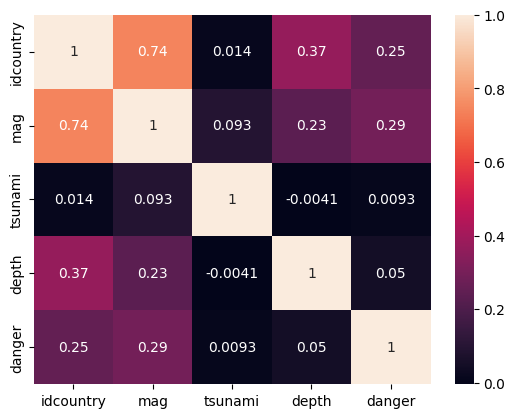

In [62]:
correlation_labeled = X_labeled.corr()
sns.heatmap(correlation_labeled, annot=True)

In [ ]:
###############################################################################################################

In [63]:
data_test = pd.read_csv('SeismicTest.csv')

In [64]:
X_test = np.array(data_test[['idcountry','mag','tsunami', 'depth']])

In [65]:
test_results = model.predict(X_test)

In [66]:
test_results = pd.Series(test_results)

In [67]:
performance = 0
for key, value in test_results.value_counts().items():
    rate = ((value/test_results.size)*100)
    count = test_results[test_results==key].count()
    if key in [8,6,2,0,7]:
        performance += rate
    print('cluster:'+str(key), 'porcentage:'+ str(round(rate,2))+'%', 'elements:'+ str(count))
print('Total number of elements:'+ str(test_results.size))
print('General performance:'+str(round(performance,2))+'%')

cluster:8 porcentage:38.27% elements:62
cluster:6 porcentage:17.28% elements:28
cluster:2 porcentage:15.43% elements:25
cluster:0 porcentage:14.81% elements:24
cluster:7 porcentage:8.02% elements:13
cluster:3 porcentage:2.47% elements:4
cluster:9 porcentage:2.47% elements:4
cluster:1 porcentage:0.62% elements:1
cluster:4 porcentage:0.62% elements:1
Total number of elements:162
General performance:93.83%
